# For this project, I use a Data Science perspective, which applies statistical techniques to a business case with some tools of software development, especially Python. 

In [43]:
import numpy as np
import pandas as pd
from scipy import stats
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
ca_median_sale_prices = pd.read_csv('/Users/lacivert/re/mspca.csv')

In [45]:
df = pd.DataFrame(ca_median_sale_prices)

In [46]:
list(df.columns.values)

['Date',
 'Hawthorne 90250',
 'Alameda 94501',
 'San Francisco 94110',
 'Folsom 95630',
 'Norwalk 90650',
 'Westminster 92683',
 'Chula Vista 91910',
 'Carmichael 95608',
 'Culver City 90066',
 'Laguna Beach 92677',
 'San Diego 92126',
 'San Diego 92101',
 'Roseville 95747',
 'Fremont 94536',
 'South Gate 90280',
 'Rancho California 92592',
 'Pacific Beach 92109',
 'San Jose 95123',
 'Kagel Canyon 91342',
 'Bostonia 92021',
 'Simi Valley 93065',
 'Costa Mesa 92627',
 'Los Angeles 90025',
 'Chino 91710',
 'Hayward 94544',
 'Vacaville 95687',
 'Dublin 94568',
 'Del Sur 93536',
 'Milpitas 95035',
 'El Toro 92630',
 'Elk Grove 95758',
 'Poplar 93257',
 'Bakersfield 93309',
 'Hayward 94541',
 'Fremont 94538',
 'Brentwood 94513',
 'Huntingtn Bch 92647',
 'Modesto 95355',
 'Gold River 95670',
 'Union City 94587',
 'Huntingtn Bch 92646',
 'Irvine 92620',
 'Cupertino 95014',
 'San Jose 95112',
 'San Diego 92105',
 'South San Fran 94080',
 'Lincoln 95648',
 'Montebello 90640',
 'Sunnyvale 94087'

In [47]:
df.round(0)

,Date,Hawthorne 90250,Alameda 94501,San Francisco 94110,Folsom 95630,Norwalk 90650,Westminster 92683,Chula Vista 91910,Carmichael 95608,Culver City 90066,...,Chula Vista 91914,Salida 95368,Fresh Pond 95726,Crowley Lake 93546,Newman 95360,Big Bear 92315,Phelan 92371,Hidden Valley Lake 95467,Arnold 95223,Lake Arrowhead 92352
0,2008-03,482500,602100,710700,415700,378300,494600,377200,299300,742500,...,553800,240400,247800,554300,196400,362800,266900,252000,367000,462300
1,2008-04,444700,599400,752100,413300,347500,461100,350600,277000,763100,...,531900,231400,260000,549800,191000,335600,259800,226700,342700,492500
2,2008-05,395900,594600,731700,424400,339800,445400,325300,275700,739400,...,487400,225200,247800,560100,171200,332600,237300,229000,315900,491100
3,2008-06,381000,576700,748700,412300,322800,440600,320500,263300,756100,...,489500,217400,249200,567600,173400,311400,213500,218500,326500,423400
4,2008-07,422200,560000,732900,405600,319500,446000,307200,265300,713300,...,498500,212200,228600,512800,171900,311400,222700,241500,332500,380300
5,2008-08,406800,588100,804000,405000,309300,447300,296600,262500,692300,...,512500,201400,229000,462700,164100,314800,227100,240800,314100,342000
6,2008-09,399400,589900,799100,418000,308000,443300,299000,264300,665100,...,525700,191500,227100,404900,162800,291900,209100,240900,327000,358100
7,2008-10,380100,586000,767800,409800,303800,432700,292300,277000,694500,...,478500,181000,225400,436100,148100,288800,200400,210900,331700,354000
8,2008-11,392700,587600,690500,394900,293800,415900,283600,272200,660700,...,461700,176400,209700,374100,152500,292100,186700,184900,310200,356800
9,2008-12,398300,610900,714300,378000,289100,409400,271500,276500,570100,...,437100,169000,205700,355700,144500,316400,186300,164800,280900,328700


In [48]:
pd.options.display.float_format = '{:,.0f}'.format # Limit output to no decimal places
df.describe()

,Hawthorne 90250,Alameda 94501,San Francisco 94110,Folsom 95630,Norwalk 90650,Westminster 92683,Chula Vista 91910,Carmichael 95608,Culver City 90066,Laguna Beach 92677,...,Chula Vista 91914,Salida 95368,Fresh Pond 95726,Crowley Lake 93546,Newman 95360,Big Bear 92315,Phelan 92371,Hidden Valley Lake 95467,Arnold 95223,Lake Arrowhead 92352
count,124,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
mean,"426,717","645,157","976,324","392,867","334,250","482,553","353,881","280,132","830,344","607,748",...,"521,977","211,552","211,749","350,681","169,100","280,774","195,720","201,400","243,380","333,384"
std,"102,377","143,637","280,418","63,470","67,295","80,711","74,849","56,190","186,880","90,528",...,"100,747","60,045","52,663","57,261","53,087","34,734","50,424","58,665","40,608","54,499"
min,"278,600","404,300","602,900","282,200","250,600","365,600","244,200","176,900","549,200","438,700",...,"365,300","134,700","127,300","263,500","94,800","201,600","121,600","106,100","163,200","239,400"
25%,"330,850","529,850","722,200","344,825","269,650","410,900","285,875","234,025","681,000","523,425",...,"437,700","155,525","170,675","314,525","121,700","259,375","151,975","150,325","216,025","293,775"
50%,"404,550","600,750","870,900","397,850","322,850","466,000","331,300","277,900","765,400","603,500",...,"491,800","204,600","207,950","342,950","155,800","285,850","185,950","199,500","242,250","334,100"
75%,"508,125","757,550","1,250,425","431,500","387,900","547,125","417,325","320,175","988,700","687,900",...,"601,650","262,525","244,525","373,875","213,150","305,825","245,600","247,425","270,650","372,100"
max,"651,300","926,200","1,520,200","539,600","472,600","657,800","528,500","400,300","1,295,800","807,800",...,"770,300","340,300","321,200","567,600","277,100","362,800","291,100","341,600","367,000","492,500"


In [49]:
# Assign variables to 5 San Francisco County zip codes

Inner_Mission = df.loc[:,'San Francisco 94110']
Castro = df.loc[:,'San Francisco 94114']
Parkside = df.loc[:,'San Francisco 94116']
Hunters_Point = df.loc[:,'San Francisco 94124']
Diamond_Heights = df.loc[:,'San Francisco 94131']

In [50]:
sf = (Inner_Mission, Castro, Parkside, Hunters_Point, Diamond_Heights)
dfsf = pd.DataFrame(data=sf)
dfsf.reset_index()
dfsanf = dfsf.transpose()

In [51]:
pd.options.display.float_format = '{:,.0f}'.format # Limit output to no decimal places
dfsanf.describe()

,San Francisco 94110,San Francisco 94114,San Francisco 94116,San Francisco 94124,San Francisco 94131
count,124,124,124,124,124
mean,"976,324","1,266,727","917,536","522,781","1,071,098"
std,"280,418","301,360","233,242","169,015","299,318"
min,"602,900","793,200","642,500","301,400","667,500"
25%,"722,200","999,925","715,900","379,500","822,600"
50%,"870,900","1,192,900","802,850","473,300","951,300"
75%,"1,250,425","1,542,325","1,146,975","663,450","1,335,875"
max,"1,520,200","1,839,800","1,441,200","936,200","1,970,700"


In [52]:
import seaborn as sns
sns.set(style="whitegrid")

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

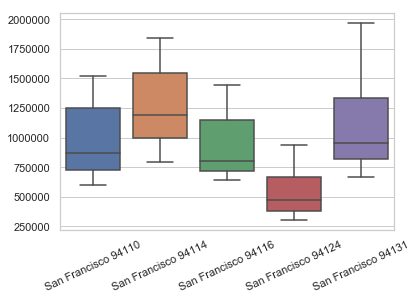

In [53]:
sns.boxplot(data=dfsanf)
plt.xticks(rotation=25)

In [54]:
# Generate a correlation matrix function and assign it
corr = dfsanf.corr()

In [55]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

Text(0.5,1,'Correlation Matrix Heatmap of San Franscisco Zip Codes from March 2008 to June 2018')

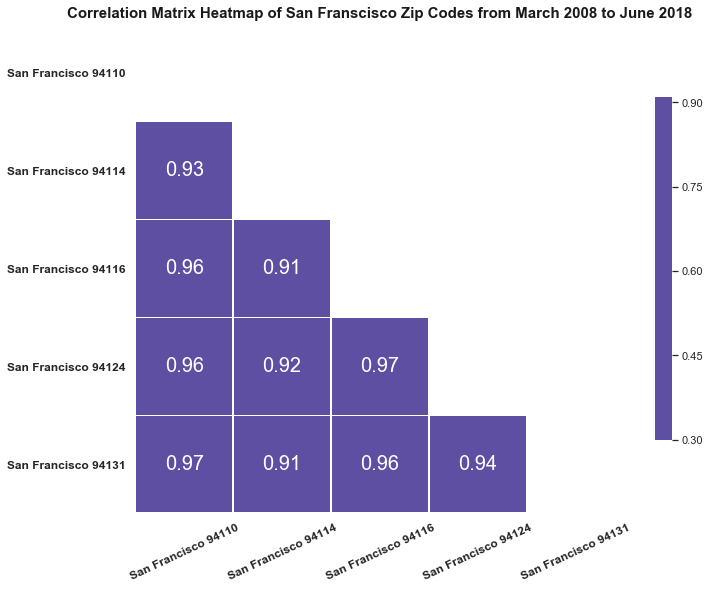

In [56]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask, correct aspect ratio and Spectral color theme
sns.heatmap(corr, mask=mask, cmap='Spectral', vmax=.3, center=0, annot_kws={"size": 20}, 
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .7})

# Make it readable and nice
plt.yticks(rotation=0, fontweight='bold', fontsize=12)
plt.xticks(rotation=25,fontweight='bold', fontsize=12)
plt.title('Correlation Matrix Heatmap of San Franscisco Zip Codes from March 2008 to June 2018'
          , fontweight='bold', fontsize=15,color='k')

/Users/lacivert/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


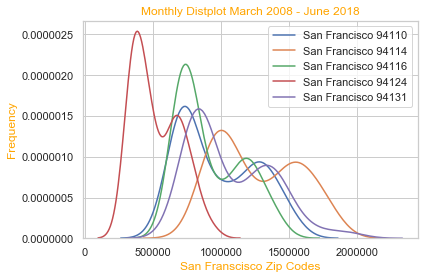

In [57]:
sns.distplot(Inner_Mission,label='San Francisco 94110',hist=False)
sns.distplot(Castro,label='San Francisco 94114',hist=False)
sns.distplot(Parkside, label='San Francisco 94116',hist=False)
sns.distplot(Hunters_Point,label='San Francisco 94124',hist=False)
sns.distplot(Diamond_Heights,label='San Francisco 94131',hist=False)

plt.xlabel('San Franscisco Zip Codes',color='orange')
plt.ylabel('Frequency',color='orange')
plt.title('Monthly Distplot March 2008 - June 2018', color='orange')
plt.legend()

In [58]:
stats.skew(Diamond_Heights), stats.skew(Hunters_Point), stats.skew(Inner_Mission), stats.skew(Castro), stats.skew(Parkside)

(0.7571737219661463,
 0.5200015963430286,
 0.42853467373641274,
 0.28088366934842707,
 0.6393854453344375)

In [59]:
# positive skew has right tail of the distribution is longer than the left, but a normal distrubtion has zero skew

In [60]:
stats.kurtosis(Diamond_Heights), stats.kurtosis(Hunters_Point), stats.kurtosis(Inner_Mission), stats.kurtosis(Castro), stats.kurtosis(Parkside)

(-0.29264351132811406,
 -0.9652319339620168,
 -1.3185129814560232,
 -1.3379529186631312,
 -1.0535962252340096)

In [61]:
# Pearson definition of kurtosis has a normal distribution of zero and negative kurtosis means thinner tails

(array([ 6., 27., 20., 12.,  6.,  6., 14., 14., 11.,  8.]),
 array([ 793200.,  897860., 1002520., 1107180., 1211840., 1316500.,
        1421160., 1525820., 1630480., 1735140., 1839800.]),
 <a list of 10 Patch objects>)

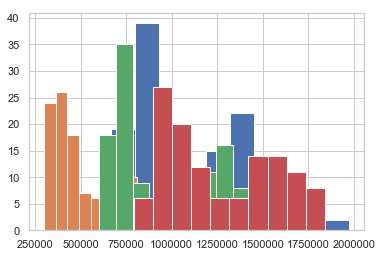

In [62]:

plt.hist(Diamond_Heights)
plt.hist(Hunters_Point)
plt.hist(Inner_Mission)
plt.hist(Castro)

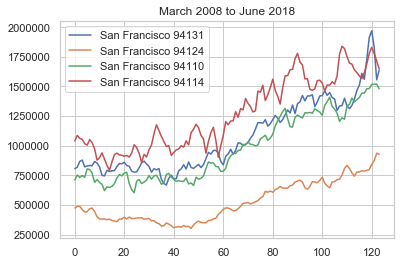

In [63]:
plt.plot(Diamond_Heights)
plt.plot(Hunters_Point)
plt.plot(Inner_Mission)
plt.plot(Castro)
plt.title("March 2008 to June 2018")
plt.legend()

# Setting up for ARIMA

In [131]:
from datetime import datetime
import datetime as dt
# loading data
sfr = pd.read_csv('/Users/lacivert/re/msf.csv')

In [132]:
df = pd.DataFrame(sfr)

In [133]:
df.head(2)

,DATE,Inner_Mission_94110,Castro_94114,Parkside_94116,Hunters_Point_94124,Diamond_Heights_94131
0,2008-03,710700,1040300,814200,473400,806000
1,2008-04,752100,1086700,783500,487500,818000


In [135]:
df.index = pd.to_datetime(df.DATE)

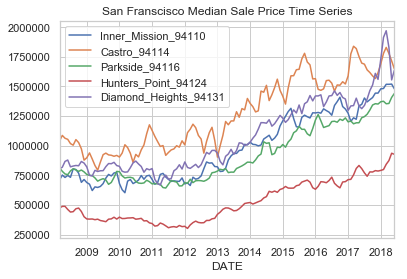

In [136]:
df.plot()
plt.title('San Franscisco Median Sale Price Time Series')
plt.show()

In [137]:
df_im = df.drop(columns=['Castro_94114', 'Parkside_94116', 'Hunters_Point_94124', 'Diamond_Heights_94131'])

In [138]:
list (df_im.columns.values)

['DATE', 'Inner_Mission_94110']

In [139]:
list (df_im.columns.values)

['DATE', 'Inner_Mission_94110']

In [140]:
df_im.head(2)

,DATE,Inner_Mission_94110
DATE,,
2008-03-01,2008-03,710700
2008-04-01,2008-04,752100


In [141]:
df['price'] = pd.to_numeric(df_im.Inner_Mission_94110, errors='coerce')

In [142]:
list(df.columns.values)

['DATE',
 'Inner_Mission_94110',
 'Castro_94114',
 'Parkside_94116',
 'Hunters_Point_94124',
 'Diamond_Heights_94131',
 'price']

In [143]:
df.index = pd.to_datetime(df.index)

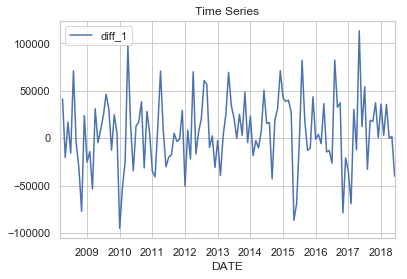

In [146]:
# Plotting the difference 

df['diff_1'] = df.price - df.price.shift()
df.plot(y='diff_1')
plt.title('Time Series')
plt.show()

Text(0.5,1,'PACF')

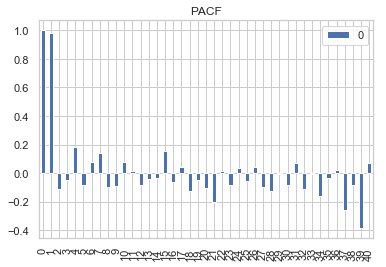

In [147]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(df.price))
x_acf.plot(kind='bar')
plt.title("PACF")

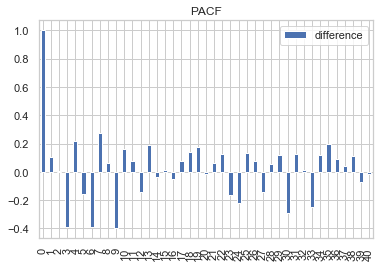

In [148]:
x_acf = pd.DataFrame(pacf(df.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("PACF")
plt.legend(['difference'])

# ARIMA

In [149]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.price, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning:

Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.

/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/lacivert/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Users/lacivert/anaconda3/lib/python3.7/site-packages

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  123
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1470.455
Method:                           css   S.D. of innovations          37645.996
Date:                Thu, 16 May 2019   AIC                           2944.910
Time:                        21:47:58   BIC                           2950.535
Sample:                    04-01-2008   HQIC                          2947.195
                         - 06-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6254.4715   3394.425      1.843      0.068    -398.479    1.29e+04
Residuals Description


TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [152]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.price, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning:

Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.

/Users/lacivert/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Users/lacivert/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this 

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                  124
Model:                     ARMA(1, 0)   Log Likelihood               -1486.225
Method:                       css-mle   S.D. of innovations          38128.722
Date:                Thu, 16 May 2019   AIC                           2978.450
Time:                        22:00:02   BIC                           2986.911
Sample:                    03-01-2008   HQIC                          2981.887
                         - 06-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.763e+05   3.25e+05      3.001      0.003    3.39e+05    1.61e+06
ar.L1.price     0.9943      0.007    137.247      0.000       0.980       1.008
                                    Roots       

In [153]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.price, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning:

Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.



                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                  124
Model:                     ARMA(1, 1)   Log Likelihood               -1485.311
Method:                       css-mle   S.D. of innovations          37851.431
Date:                Thu, 16 May 2019   AIC                           2978.622
Time:                        22:00:27   BIC                           2989.903
Sample:                    03-01-2008   HQIC                          2983.204
                         - 06-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.763e+05   3.04e+05      3.212      0.002    3.81e+05    1.57e+06
ar.L1.price     0.9927      0.009    113.305      0.000       0.976       1.010
ma.L1.price     0.1103      0.078      1.410    

In [154]:
# the P>|z| or p value is 0.161
# The moving average of ma.L1.price is not good with -0.043 crossing zero in the confidence interval 

In [155]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.price, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  123
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1469.815
Method:                       css-mle   S.D. of innovations          37448.910
Date:                Thu, 16 May 2019   AIC                           2947.630
Time:                        22:07:38   BIC                           2958.878
Sample:                    04-01-2008   HQIC                          2952.199
                         - 06-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5985.0721   3762.917      1.591      0.114   -1390.110    1.34e+04
ar.L1.D.price     0.1103      0.314      0.352      0.726      -0.504       0.725
ma.L1.D.price    -0.0077      0.304     

/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning:

Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.

/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [156]:
# Exponential Smoothing data treatment
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# fit model
model_expSm = SimpleExpSmoothing(df.price) 
model_expSm_fit = model_expSm.fit()

/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning:

Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.



# Another dataset, but longer

In [157]:
sf_median_sale_prices = pd.read_csv('/Users/lacivert/re/sfm.csv')

In [158]:
df = pd.DataFrame(sf_median_sale_prices)

In [161]:
list(df.columns.values)

['Month', 'San Francisco Median Price', 'Zip Codes Included']

In [169]:
df.head(19)

,Month,San Francisco Median Price,Zip Codes Included
0,1996-04,258100,'94109
1,1996-05,260850,'94110
2,1996-06,262750,'94122
3,1996-07,265000,'94112
4,1996-08,267100,'94115
5,1996-09,267950,'94117
6,1996-10,268350,'94121
7,1996-11,269900,'94118
8,1996-12,271800,'94114
9,1997-01,273550,'94107


In [171]:
df.drop(columns=['Zip Codes Included'])

,Month,San Francisco Median Price
0,1996-04,258100
1,1996-05,260850
2,1996-06,262750
3,1996-07,265000
4,1996-08,267100
5,1996-09,267950
6,1996-10,268350
7,1996-11,269900
8,1996-12,271800
9,1997-01,273550


In [172]:
#from pandas import read_csv
#from matplotlib import pyplot
#from statsmodels.tsa.arima_model import ARIMA
#from sklearn.metrics import MeanSquaredError

#get data
#def GetData(fileName):
#    return read_csv(fileName, header=0, parse_dates=[0], index_col=0).values

#Function that calls ARIMA model to fit and forecast the data
#def StartARIMAForecasting(Actual, P, D, Q):
#	model = ARIMA(Actual, order=(P, D, Q))
#	model_fit = model.fit(disp=0)
#	prediction = model_fit.forecast()[0]
#	return prediction
    
#Get exchange rates
#ActualData = GetData('data.csv')
#Size of exchange rates
#NumberOfElements = len(ActualData)

#Use 70% of data as training, rest 30% to Test model
#TrainingSize = int(NumberOfElements * 0.7)
#TrainingData = ActualData[0:TrainingSize]
#TestData = ActualData[TrainingSize:NumberOfElements]

#new arrays to store actual and predictions
#Actual = [x for x in TrainingData]
#Predictions = list()


#in a for loop, predict values using ARIMA model
#for timepoint in range(len(TestData)):
#	ActualValue =  TestData[timepoint]
#	#forcast value
#	Prediction = StartARIMAForecasting(Actual, 3,1,0)    
#	print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
#	#add it in the list
#	Predictions.append(Prediction)
#	Actual.append(ActualValue)

#Print MSE to see how good the model is
#Error = MeanSquaredError(TestData, Predictions)
#print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)
# plot
#pyplot.plot(TestData)
#pyplot.plot(Predictions, color='red')
#pyplot.show()